# Lbraries

In [1]:
import os
import cv2
import random
import numpy as np

from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D , Dropout
from tensorflow.keras.utils import normalize
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

from sklearn.metrics import classification_report, confusion_matrix

# Data

In [2]:
# read train data
path1 = r'C:\Users\fagr\Desktop\ML_projects\DL\CNN\Cancer\lung\Train'
categories = ['adenocarcinoma' , 'benign']
img_size = 50
training_data =[]


for i in categories:
  path2 = os.path.join(path1 , i)
  class_name = categories.index(i)
  for img in os.listdir(path2):
    img_array = cv2.imread(os.path.join(path2,img))
    new_array = cv2.resize(img_array , (50,50))
    training_data.append([new_array , class_name])
    
# split to features & label    
random.shuffle(training_data)    
x_train =[]
y_train = []
for feature ,label in training_data:
  x_train.append(feature)
  y_train.append(label)  
x_train = np.array(x_train)
y_train = np.array(y_train)

In [3]:
# read validation data
path1 = r'C:\Users\fagr\Desktop\ML_projects\DL\CNN\Cancer\lung\Val'
categories = ['adenocarcinoma' , 'benign']
img_size = 50
valid_data =[]


for i in categories:
  path2 = os.path.join(path1 , i)
  class_name = categories.index(i)
  for img in os.listdir(path2):
    img_array = cv2.imread(os.path.join(path2,img) )
    new_array = cv2.resize(img_array , (50,50) )
    valid_data.append([new_array , class_name])

# split to features & label    
random.shuffle(valid_data)    
x_valid =[]
y_valid = []
for feature ,label in training_data:
  x_valid.append(feature)
  y_valid.append(label)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)    

In [4]:
# read test data
path1 = r'C:\Users\fagr\Desktop\ML_projects\DL\CNN\Cancer\lung\Test'
categories = ['adenocarcinoma' , 'benign']
img_size = 50
test_data =[]


for i in categories:
  path2 = os.path.join(path1 , i)
  class_name = categories.index(i)
  for img in os.listdir(path2):
    img_array = cv2.imread(os.path.join(path2,img) )
    new_array = cv2.resize(img_array , (50,50))
    test_data.append([new_array , class_name])

# split to features & label
random.shuffle(test_data)    
x_test =[]
y_test = []
for feature ,label in training_data:
  x_test.append(feature)
  y_test.append(label) 
x_test = np.array(x_test)
y_test = pd.DataFrame(y_test)    

<IPython.core.display.Javascript object>

# EDA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

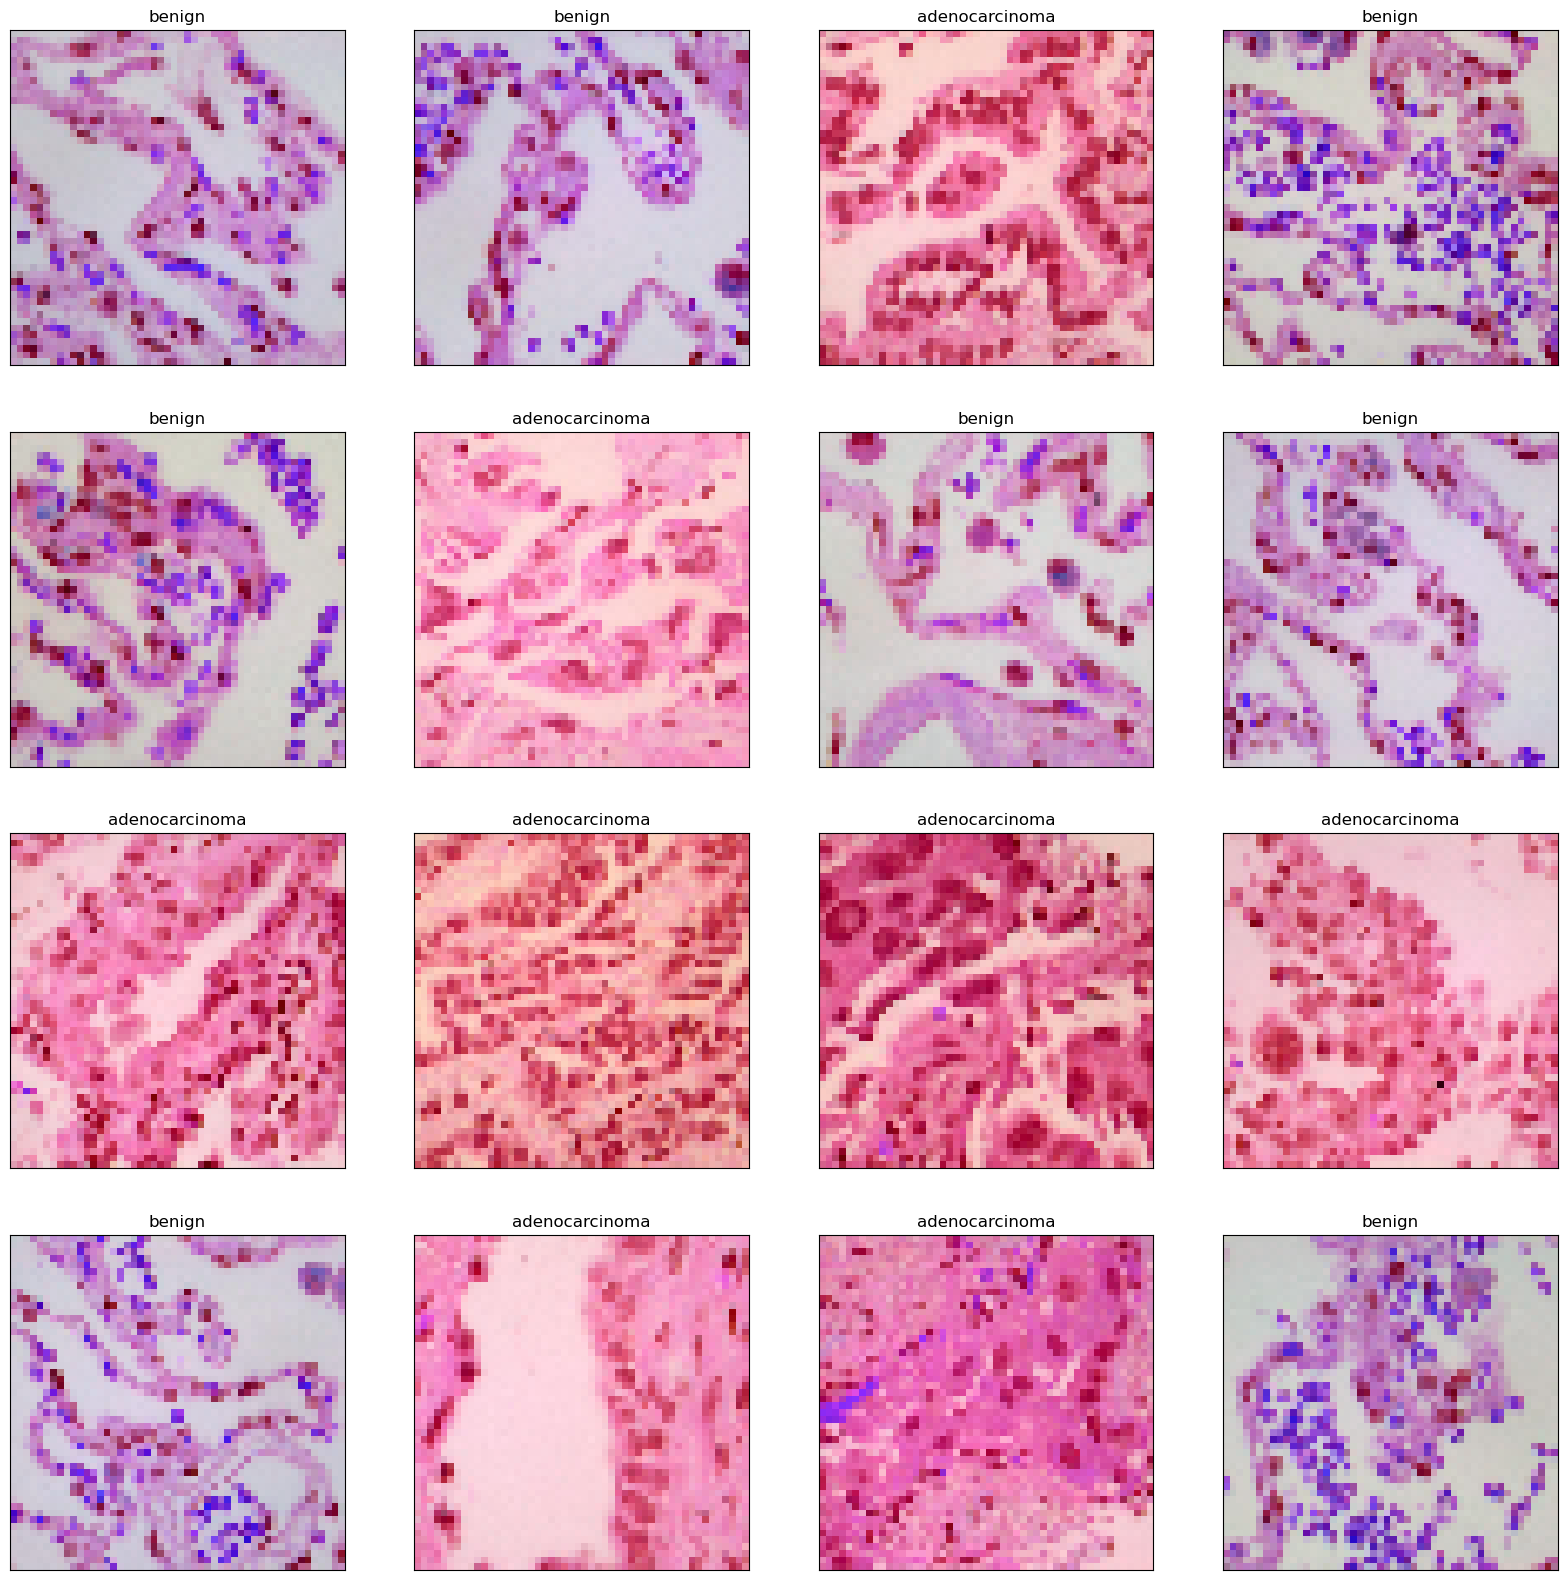

In [5]:
# show sample from data
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i])
    plt.title(f"{categories[y_train[i]]}")
    plt.xticks([])
    plt.yticks([])
    
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

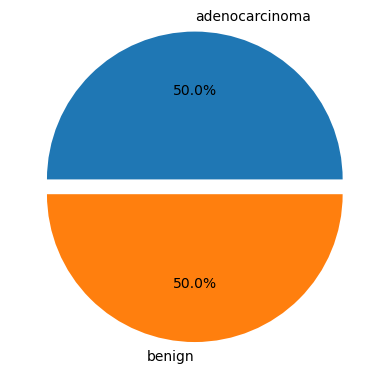

In [6]:
# pie
plt.pie([(len(y_train[y_train == 0])) , (len(y_train[y_train == 1]))],labels = categories , autopct="%1.1f%%",
                                        explode = [0.1,0])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

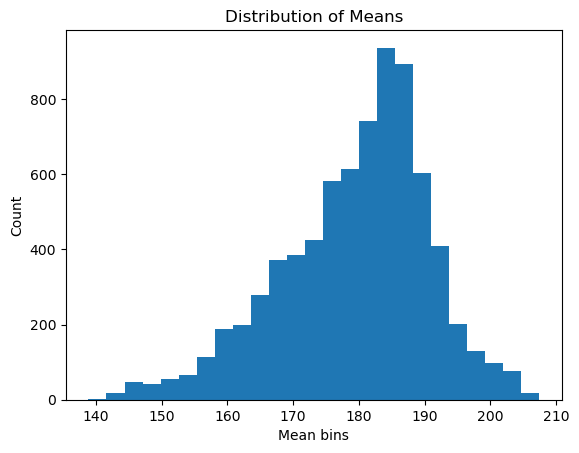

In [7]:
# mean distribution
mean_list =[ np.mean(img) for img in x_train]
plt.hist(mean_list ,bins =25)
plt.title('Distribution of Means')
plt.xlabel('Mean bins')
plt.ylabel('Count')
plt.show()

In [8]:
# Normalize data
x_train = normalize(x_train)
x_valid = normalize(x_valid)
x_test = normalize(x_test)

# Model

In [24]:
# build model
model = Sequential()
model.add(Conv2D(20 ,(3,3) , padding = 'same' , input_shape = (img_size , img_size ,3) , activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(40 ,(3,3) , padding = 'same' , input_shape = (img_size , img_size ,3) , activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(70 ,(3,3) , padding = 'same' , input_shape = (img_size , img_size ,3) , activation = 'relu'))
model.add(MaxPooling2D(2,2))
#model.add(Conv2D(40 ,(3,3) , padding = 'same' , input_shape = (img_size , img_size ,3) , activation = 'relu'))
#model.add(MaxPooling2D(2,2))
#model.add(Conv2D(20 ,(3,3) , padding = 'same' , input_shape = (img_size , img_size ,3) , activation = 'relu'))
#model.add(MaxPooling2D(2,2))
model.add(Flatten())

model.add(Dense(150, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='relu'))


In [25]:
# choose optimizer and metric
model.compile (optimizer = 'adam' ,loss = 'binary_crossentropy', metrics = ['accuracy'])

# Early stopping 
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# check point
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [28]:
# train the model
model.fit(x_train ,y_train ,validation_data = (x_valid , y_valid) , epochs = 100 ,batch_size = 20
                               ,callbacks = [early_stopping , checkpoint])

Epoch 1/100
375/375 [==============================] - ETA: 0s - loss: 0.2085 - accuracy: 0.6345
Epoch 1: val_accuracy improved from 0.50000 to 0.96427, saving model to best_model.h5
375/375 [==============================] - 10s 26ms/step - loss: 0.2085 - accuracy: 0.6345 - val_loss: 0.1262 - val_accuracy: 0.9643
Epoch 2/100
374/375 [============================>.] - ETA: 0s - loss: 0.1487 - accuracy: 0.7131
Epoch 2: val_accuracy did not improve from 0.96427
375/375 [==============================] - 9s 24ms/step - loss: 0.1484 - accuracy: 0.7131 - val_loss: 0.0973 - val_accuracy: 0.9493
Epoch 3/100
375/375 [==============================] - ETA: 0s - loss: 0.1209 - accuracy: 0.6561
Epoch 3: val_accuracy did not improve from 0.96427
375/375 [==============================] - 9s 24ms/step - loss: 0.1209 - accuracy: 0.6561 - val_loss: 0.0967 - val_accuracy: 0.9332
Epoch 4/100
374/375 [============================>.] - ETA: 0s - loss: 0.1637 - accuracy: 0.6115
Epoch 4: val_accuracy did n

In [29]:
# evaluate model on train data
train_loss , train_accuracy = model.evaluate(x_train ,y_train)
print("train loss: " , train_loss)
print("train accuracy: ", train_accuracy)

235/235 [==============================] - 2s 10ms/step - loss: 0.0967 - accuracy: 0.9332
train loss:  0.096706822514534
train accuracy:  0.9332000017166138


In [30]:
# evaluate model on validation data
val_loss , val_accuracy = model.evaluate(x_valid ,y_valid)
print("validation loss: " , val_loss)
print("validation accuracy: ", val_accuracy)

235/235 [==============================] - 2s 9ms/step - loss: 0.0967 - accuracy: 0.9332
validation loss:  0.096706822514534
validation accuracy:  0.9332000017166138


In [31]:
# evaluate model on test data
test_loss , test_accuracy = model.evaluate(x_test ,y_test)
print("Test loss: " , test_loss)
print("Test accuracy: ", test_accuracy)

235/235 [==============================] - 2s 9ms/step - loss: 0.0967 - accuracy: 0.9332
Test loss:  0.096706822514534
Test accuracy:  0.9332000017166138


In [32]:
# predict test dat
pred = model.predict(x_test)

235/235 [==============================] - 2s 8ms/step


In [33]:
predictions = []
for i in range(len(pred)):
    predictions.append(np.argmax(pred[i]))
z= np.array(predictions)

In [34]:
prediction = pd.DataFrame(z ,columns =['Y_pred' ])
prediction ['Y_test'] = y_test.values.ravel()

<IPython.core.display.Javascript object>

In [35]:
# true value & prediction
prediction

,Y_pred,Y_test
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
7495,1,0
7496,0,0
7497,0,0
7498,1,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

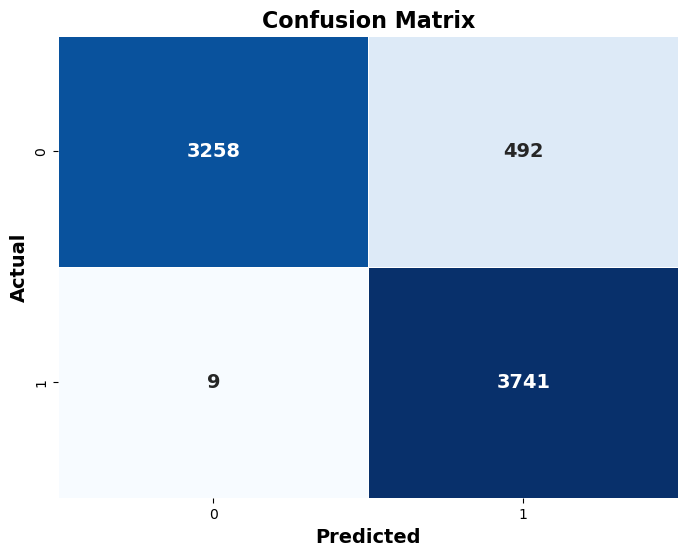

In [36]:
# confusion matrix
confusion = confusion_matrix(y_test.values.ravel(), predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

In [37]:
# classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      3750
           1       0.88      1.00      0.94      3750

    accuracy                           0.93      7500
   macro avg       0.94      0.93      0.93      7500
weighted avg       0.94      0.93      0.93      7500

